# Example 3

图像的本质也是一个矩阵，图像处理的本质也就是对矩阵的操作。
本示例选择了对图像的简单处理和分析，来让大家对numpy在做一定的了解和熟悉

需要完成的任务有：
1. 将彩色的图像转化为黑白图像
2. 计算rgb的柱状图数据(即统计单一颜色的不同亮度下的像素个数)

![](./Rick_and_Morty_characters.jpg)

---
背景知识：

- [RGB](https://en.wikipedia.org/wiki/RGB_color_model)
- [影像直方图](https://en.wikipedia.org/wiki/Image_histogram)
- [灰度](https://en.wikipedia.org/wiki/Grayscale)

---
- numpy的函数
- 三维张量的操作
- 数据类型

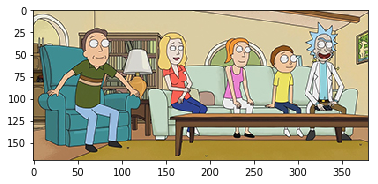

In [1]:
# 导入模块
%matplotlib inline
from dataset import Dataset
import matplotlib.pyplot as plt
import numpy as np

# 导入数据
demodata = Dataset()
pic = demodata.load('example3')

# 预览图像
plt.imshow(pic)
plt.show()

In [ ]:
# 彩色转化为黑白灰度图像

# your code here
# mono = ...

# 检验结果
demodata.show_mono(mono)

In [ ]:
# 计算直方图

# your code here
# vr = ...
# vg = ...
# vb = ...

# 检验结果
# demodata.show_histogram(vr, vg, vb)

In [ ]:
# 参考
mono = pic[:,:,0] * 0.2126 + pic[:,:,1] * 0.7152 + pic[:,:,2] * 0.0722
mono = np.uint8(mono)
demodata.show_mono(mono)

vr, _ = np.histogram(pic[:,:, 0], range=(0, 256), bins=256)
vg, _ = np.histogram(pic[:,:, 1], range=(0, 256), bins=256)
vb, _ = np.histogram(pic[:,:, 2], range=(0, 256), bins=256)
demodata.show_histogram(vr, vg, vb)